In [1]:
# Imports iniciales
from data_gen import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from tree import entrenar, clasificar


## Ejercicio 1

In [2]:
def ejercicio_1_no_noise(data, test):

    X_raw, y_raw = data.iloc[:, :-1], data.iloc[:, -1:]
    X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1:]

    X_train, X_val, y_train, y_val = train_test_split(
        X_raw, y_raw, test_size=0.2, random_state=42
    )

    best_error_val = 1
    best_n = 0

    errors = []

    for n in range(2, 15):
        knclf = KNeighborsClassifier(n)

        knclf.fit(X_train, np.ravel(y_train))

        results_test = knclf.predict(X_test)
        results_val = knclf.predict(X_val)
        results_train = knclf.predict(X_train)

        error_train = 1 - accuracy_score(y_train, results_train)
        error_val = 1 - accuracy_score(y_val, results_val)
        error_test = 1 - accuracy_score(y_test, results_test)

        errors.append([n, error_train, error_val, error_test])

        if error_val < best_error_val:
            best_error_val = error_val
            best_n = n
            best_results = results_test

    df_errors = pd.DataFrame(
        errors, columns=["N", "Error Train", "Error Val", "Error Test"]
    )
    print("The best N: " + str(best_n) + " with error: " + str(best_error_val))

    print(df_errors)
    plot_knn_errors(df_errors)

    plot(test, title="Original")

    # Tree Classifier
    tree_clf = entrenar(data)
    df_results_tree = clasificar(test, tree_clf)
    plot(df_results_tree, title="Tree")

    # KNN Classifier
    df_results_knn = X_test.copy()
    df_results_knn["Class"] = best_results
    plot(df_results_knn, title="KNN")


def ejercicio_1_noise(data, test):

    X_raw, y_raw = data.iloc[:, :-1], data.iloc[:, -1:]
    X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1:]

    X_train, X_val, y_train, y_val = train_test_split(
        X_raw, y_raw, test_size=0.2, random_state=42
    )

    best_error_val = 1
    best_n = 0

    errors = []

    for n in range(2, 15):
        knclf = KNeighborsClassifier(n)

        knclf.fit(X_train, np.ravel(y_train))

        results_test = knclf.predict(X_test)
        results_val = knclf.predict(X_val)
        results_train = knclf.predict(X_train)

        error_train = 1 - accuracy_score(y_train, results_train)
        error_val = 1 - accuracy_score(y_val, results_val)
        error_test = 1 - accuracy_score(y_test, results_test)

        errors.append([n, error_train, error_val, error_test])

        if error_val < best_error_val:
            best_error_val = error_val
            best_n = n
            best_results = results_test

    df_errors = pd.DataFrame(
        errors, columns=["N", "Error Train", "Error Val", "Error Test"]
    )
    print("The best N: " + str(best_n) + " with error: " + str(best_error_val))

    print(df_errors)
    plot_knn_errors(df_errors)

    test.drop(["2", "3"], axis=1)

    plot(test, title="Original")

    # Tree Classifier
    tree_clf = entrenar(data)
    df_results_tree = clasificar(test, tree_clf)
    df_results_tree.drop(["2", "3"], axis=1)
    plot(df_results_tree, title="Tree")

    # KNN Classifier
    df_results_knn = X_test.copy()
    df_results_knn["Class"] = best_results
    df_results_knn.drop(["2", "3"], axis=1)
    plot(df_results_knn, title="KNN")


def ejercicio_1():
    data = pd.read_csv("TP_4/c_0.data", names=["0", "1", "Class"], header=None,)

    test = pd.read_csv("TP_4/c_0.test", names=["0", "1", "Class"], header=None,)

    ejercicio_1_no_noise(data, test)

    data_noisy = pd.read_csv(
        "TP_4/c_2.data", names=["0", "1", "2", "3", "Class"], header=None,
    )

    test_noisy = pd.read_csv(
        "TP_4/c_2.test", names=["0", "1", "2", "3", "Class"], header=None,
    )

    ejercicio_1_noise(data_noisy, test_noisy)


The best N: 2 with error: 0.08999999999999997
     N  Error Train  Error Val  Error Test
0    2      0.03250      0.090     0.12600
1    3      0.03125      0.100     0.10250
2    4      0.03875      0.115     0.12325
3    5      0.04750      0.120     0.11300
4    6      0.05875      0.130     0.12625
5    7      0.05125      0.100     0.11175
6    8      0.06125      0.115     0.11725
7    9      0.06500      0.115     0.11575
8   10      0.08250      0.110     0.13725
9   11      0.07875      0.115     0.12850
10  12      0.08125      0.110     0.13750
11  13      0.08250      0.105     0.13300
12  14      0.08250      0.115     0.13150


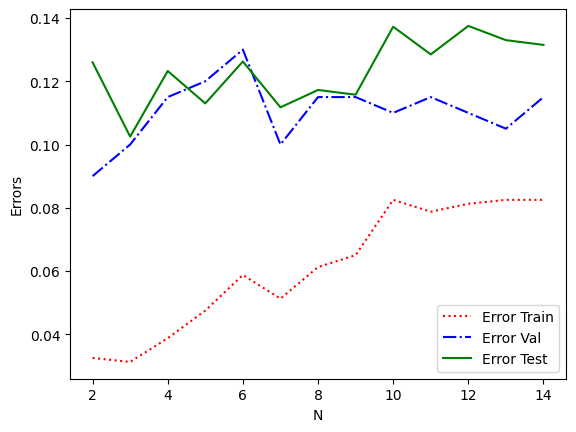

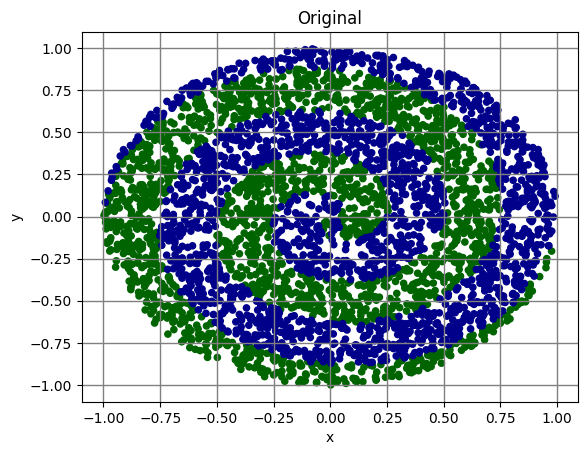

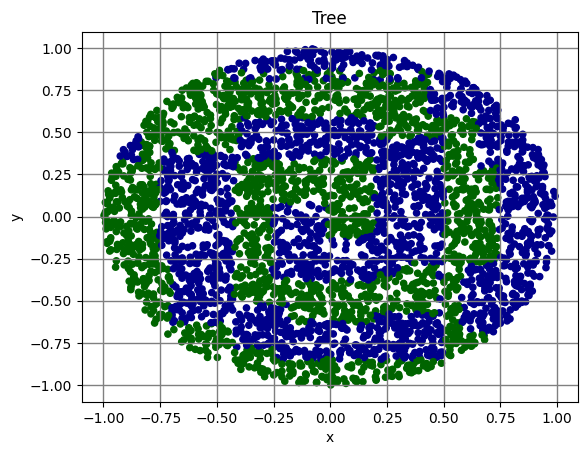

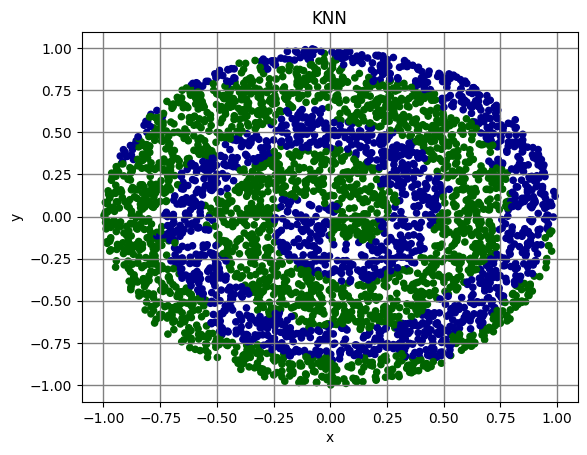

The best N: 2 with error: 0.44999999999999996
     N  Error Train  Error Val  Error Test
0    2      0.20500      0.450     0.41425
1    3      0.18500      0.485     0.40875
2    4      0.26000      0.460     0.43650
3    5      0.24250      0.485     0.43750
4    6      0.28875      0.530     0.45125
5    7      0.28625      0.490     0.45350
6    8      0.31250      0.515     0.46900
7    9      0.31625      0.515     0.47050
8   10      0.33875      0.550     0.47375
9   11      0.35000      0.540     0.47200
10  12      0.35500      0.545     0.47800
11  13      0.34625      0.535     0.47525
12  14      0.35750      0.525     0.48700


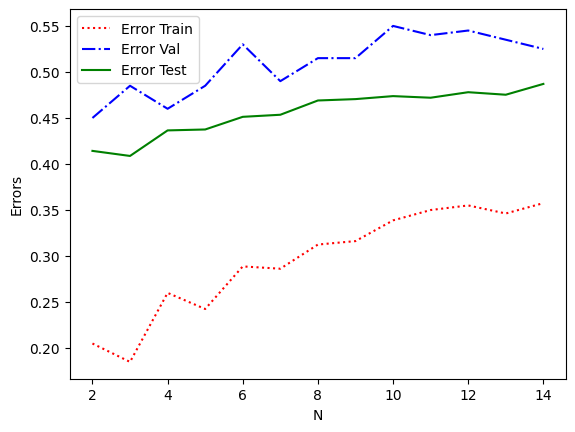

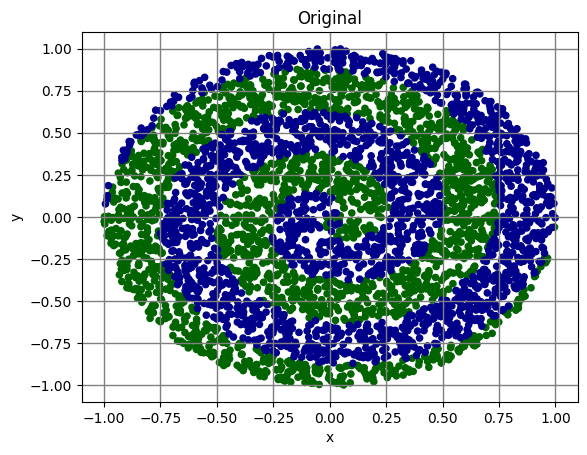

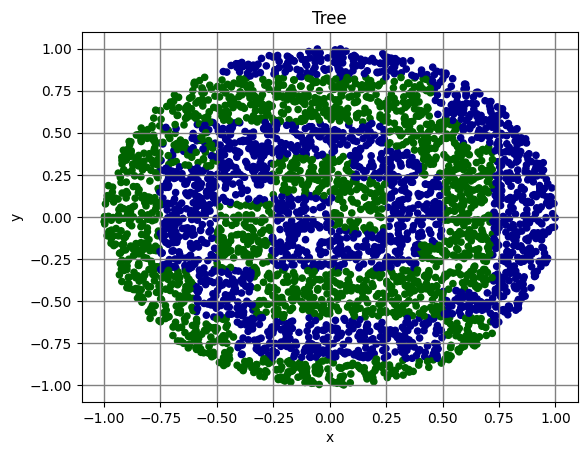

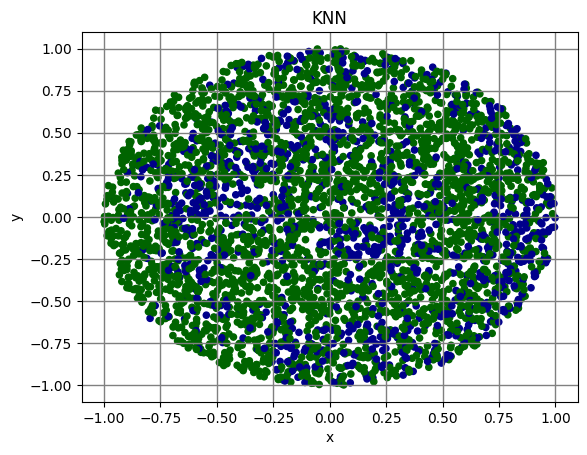

In [3]:
ejercicio_1()

### Conclusiones sin Ruido

Sin ruido el KNN resulta muy superior al Tree. El resultado es prácticamente idéntico al original. Podemos empezar a notar un pequeño sobreajuste por el final de la curva pero no es tan significativo.

### Conclusiones con Ruido

Con ruido el KNN resulta mucho peor que el Tree (de hecho al Tree casi que salió mejor esta vez), esto es esperable porque al KNN se fija en los vecinos y si hay ruido es normal que el resultado sea muy errático.

## Ejercicio 2

In [4]:
def knn_train(n, X_train, y_train, X_val, y_val, X_test, y_test, w=False):
    if w:
        knclf = KNeighborsClassifier(n, weights="distance")
    else:
        knclf = KNeighborsClassifier(n)

    knclf.fit(X_train, np.ravel(y_train))

    results_test = knclf.predict(X_test)
    results_val = knclf.predict(X_val)
    results_train = knclf.predict(X_train)

    error_train = 1 - accuracy_score(y_train, results_train)
    error_val = 1 - accuracy_score(y_val, results_val)
    error_test = 1 - accuracy_score(y_test, results_test)

    return error_train, error_val, error_test


def ejercicio_2():
    c = 0.78
    n = 250

    d_values = [2, 4, 8, 16, 32]

    errors = []

    for d in d_values:
        centros_a = centros_eja(d)

        test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)
        X_test, y_test = test_case_a.iloc[:, :-1], test_case_a.iloc[:, -1:]

        test_error_para_1 = 0.0
        values_error_para_1 = 0.0
        test_error_para_k = 0.0
        values_error_para_k = 0.0
        test_error_diag_1 = 0.0
        values_error_diag_1 = 0.0
        test_error_diag_k = 0.0
        values_error_diag_k = 0.0

        for j in range(20):
            values = generar_valores(centros_a, c * sqrt(d), d, n)
            X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

            X_train, X_val, y_train, y_val = train_test_split(
                X_raw, y_raw, test_size=0.2, random_state=42
            )

            error_train_1, _, error_test_1 = knn_train(
                1, X_train, y_train, X_val, y_val, X_test, y_test
            )
            error_train_k, _, error_test_k = knn_train(
                2, X_train, y_train, X_val, y_val, X_test, y_test
            )

            values_error_para_1 += error_train_1
            test_error_para_1 += error_test_1
            values_error_para_k += error_train_k
            test_error_para_k += error_test_k

        test_error_para_1 = test_error_para_1 / 20
        values_error_para_1 = values_error_para_1 / 20
        test_error_para_k = test_error_para_k / 20
        values_error_para_k = values_error_para_k / 20

        centros_b = centros_ejb(d)
        test_case_b = generar_valores(centros_b, c, d, 10000)
        X_test, y_test = test_case_b.iloc[:, :-1], test_case_b.iloc[:, -1:]

        for j in range(20):
            values = generar_valores(centros_b, c, d, n)
            X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

            X_train, X_val, y_train, y_val = train_test_split(
                X_raw, y_raw, test_size=0.2, random_state=42
            )

            error_train_1, _, error_test_1 = knn_train(
                1, X_train, y_train, X_val, y_val, X_test, y_test
            )
            error_train_k, _, error_test_k = knn_train(
                2, X_train, y_train, X_val, y_val, X_test, y_test
            )

            test_error_diag_1 += error_test_1
            values_error_diag_1 += error_train_1
            test_error_diag_k += error_test_k
            values_error_diag_k += error_train_k

        test_error_diag_1 = test_error_diag_1 / 20
        values_error_diag_1 = values_error_diag_1 / 20
        test_error_diag_k = test_error_diag_k / 20
        values_error_diag_k = values_error_diag_k / 20

        errors.append([test_error_para_1, d, "Test_Parallel_KN1"])
        errors.append([values_error_para_1, d, "Val_Parallel_KN1"])
        errors.append([test_error_diag_1, d, "Test_Diagonal_KN1"])
        errors.append([values_error_diag_1, d, "Val_Diagonal_KN1"])
        errors.append([test_error_para_k, d, "Test_Parallel_KNK"])
        errors.append([values_error_para_k, d, "Val_Parallel_KNK"])
        errors.append([test_error_diag_k, d, "Test_Diagonal_KNK"])
        errors.append([values_error_diag_k, d, "Val_Diagonal_KNK"])

    df_errors = pd.DataFrame(errors, columns=["Error", "D", "Type"])
    df_errors.to_csv("TP_4/errors_ej_2.csv", index=False)


def ejercicio_2_print():
    df_errors_tree = pd.read_csv("TP_1/errors_ej_4.csv")
    df_errors_nn = pd.read_csv("TP_2/errors_ej_5.csv")
    df_errors_bayes = pd.read_csv("TP_3/errors_ej_1.csv")
    df_errors_knn = pd.read_csv("TP_4/errors_ej_2.csv")
    df_errors = pd.concat(
        [df_errors_tree, df_errors_nn, df_errors_bayes, df_errors_knn]
    )
    print(df_errors)
    plot_error_lines_with_dimensions(df_errors)


       Error   D                    Type
0   0.133770   2      Tree_Parallel_Test
1   0.069800   2  Tree_Parallel_Training
2   0.170380   4      Tree_Parallel_Test
3   0.066400   4  Tree_Parallel_Training
4   0.230475   8      Tree_Parallel_Test
..       ...  ..                     ...
35  0.000000  32        Val_Diagonal_KN1
36  0.272065  32       Test_Parallel_KNK
37  0.129500  32        Val_Parallel_KNK
38  0.259360  32       Test_Diagonal_KNK
39  0.123000  32        Val_Diagonal_KNK

[100 rows x 3 columns]


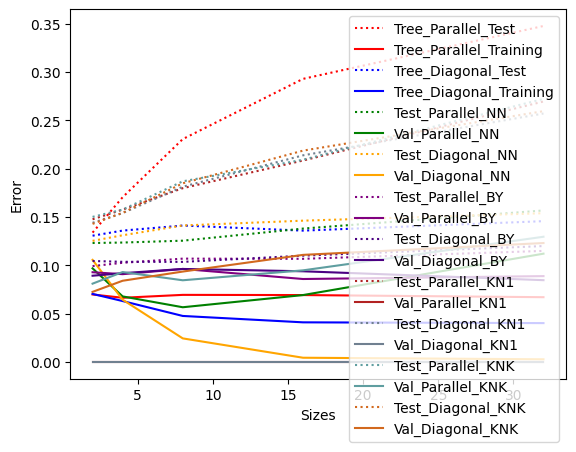

In [5]:
ejercicio_2_print()

### Conclusiones ejercicio 2

Aunque el gráfico está vada vez más confuso, el KNN para 2 (el k elegido) y para 1 es inferior a los casos anteriores. Particularmente el KNN con 1 (KN1) para paralelos es muy inferior cuando crece la dimensionalidad. Lo cual es esperable dado que debe estar lleno de huecos para una dimensionalidad muy grande (y casos bordes acumulados) así que lo esperable sería que de resultados más erráticos.

## Ejercicio 3

In [13]:
def choose_best_k():

    c = 0.78
    n = 250
    d = 32

    centros_a = centros_eja(d)

    test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)
    X_test, y_test = test_case_a.iloc[:, :-1], test_case_a.iloc[:, -1:]

    values = generar_valores(centros_a, c * sqrt(d), d, n)
    X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

    X_train, X_val, y_train, y_val = train_test_split(
        X_raw, y_raw, test_size=0.2, random_state=42
    )

    best_error_val = 1

    for k in range(1, 50):
        _, error_val, _ = knn_train(
            k, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )

        if error_val < best_error_val:
            best_error_val = error_val
            best_k_para = k

    print("The best K parallel is " + str(best_k_para))

    centros_b = centros_ejb(d)

    test_case_b = generar_valores(centros_b, c, d, 10000)
    X_test, y_test = test_case_b.iloc[:, :-1], test_case_b.iloc[:, -1:]

    values = generar_valores(centros_b, c, d, n)
    X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

    X_train, X_val, y_train, y_val = train_test_split(
        X_raw, y_raw, test_size=0.2, random_state=42
    )

    best_error_val = 1

    for k in range(1, 50):
        _, error_val, _ = knn_train(
            k, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )

        if error_val < best_error_val:
            best_error_val = error_val
            best_k_diag = k

    print("The best K diagonal is " + str(best_k_diag))

    return best_k_para, best_k_diag


def ejercicio_3():
    c = 0.78
    n = 250

    d_values = [2, 4, 8, 16, 32]

    k_optimo_para, k_optimo_diag = choose_best_k()

    errors = []

    for d in d_values:
        centros_a = centros_eja(d)

        test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)
        X_test, y_test = test_case_a.iloc[:, :-1], test_case_a.iloc[:, -1:]

        values = generar_valores(centros_a, c * sqrt(d), d, n)
        X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

        X_train, X_val, y_train, y_val = train_test_split(
            X_raw, y_raw, test_size=0.2, random_state=42
        )

        error_train_w_50, _, error_test_w_50 = knn_train(
            50, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )
        error_train_w_best, _, error_test_w_best = knn_train(
            k_optimo_para, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )

        error_train_1, _, error_test_1 = knn_train(
            1, X_train, y_train, X_val, y_val, X_test, y_test
        )
        error_train_k, _, error_test_k = knn_train(
            2, X_train, y_train, X_val, y_val, X_test, y_test
        )

        errors.append([error_test_1, d, "Test_Parallel_KN1"])
        errors.append([error_train_1, d, "Val_Parallel_KN1"])
        errors.append([error_test_k, d, "Test_Parallel_KNK"])
        errors.append([error_train_k, d, "Val_Parallel_KNK"])
        errors.append([error_test_w_50, d, "Test_Parallel_Weight_KN50"])
        errors.append([error_train_w_50, d, "Val_Parallel_Weight_KN50"])
        errors.append([error_test_w_best, d, "Test_Parallel_Weight_KNBest"])
        errors.append([error_train_w_best, d, "Val_Parallel_Weight_KNBest"])

    for d in d_values:
        centros_b = centros_ejb(d)

        test_case_b = generar_valores(centros_b, c, d, 10000)
        X_test, y_test = test_case_b.iloc[:, :-1], test_case_b.iloc[:, -1:]

        values = generar_valores(centros_b, c * sqrt(d), d, n)
        X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

        X_train, X_val, y_train, y_val = train_test_split(
            X_raw, y_raw, test_size=0.2, random_state=42
        )

        error_train_w_50, _, error_test_w_50 = knn_train(
            50, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )
        error_train_w_best, _, error_test_w_best = knn_train(
            k_optimo_diag, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )

        error_train_1, _, error_test_1 = knn_train(
            1, X_train, y_train, X_val, y_val, X_test, y_test
        )
        error_train_k, _, error_test_k = knn_train(
            2, X_train, y_train, X_val, y_val, X_test, y_test
        )

        errors.append([error_test_1, d, "Test_Diagonal_KN1"])
        errors.append([error_train_1, d, "Train_Diagonal_KN1"])
        errors.append([error_test_k, d, "Test_Diagonal_KNK"])
        errors.append([error_train_k, d, "Train_Diagonal_KNK"])
        errors.append([error_test_w_50, d, "Test_Diagonal_Weight_KN50"])
        errors.append([error_train_w_50, d, "Train_Diagonal_Weight_KN50"])
        errors.append([error_test_w_best, d, "Test_Diagonal_Weight_KNBest"])
        errors.append([error_train_w_best, d, "Train_Diagonal_Weight_KNBest"])

    df_errors = pd.DataFrame(errors, columns=["Error", "D", "Type"])
    plot_error_lines_with_dimensions(df_errors)

The best K parallel is 29
The best K diagonal is 37


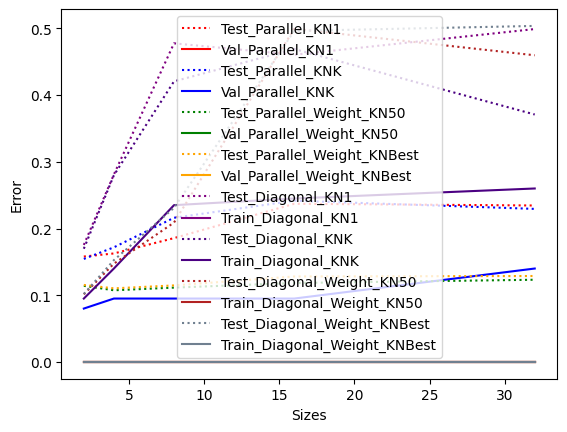

In [14]:
ejercicio_3()

### Conclusiones ejercicio 3

Los resultados de este ejercicio fueron muy erráticos. Los K que resultan mejor van variando bastante corrida a corrida, mirando un poco los resultados, noto que los valores son bastante iguales entre algunos valores, e imagino que va variando de K en K por pequeños decimales. Ninguno es muy bueno. 

Los demás resultados son dentro del todo esperables, KN1 vuelve a ser malo para ambos casos, pero los test de los K best son los mejores, probablemente por sobreajuste. Si bien fueron elegidos por validación es notable el resultado en el train error, así que en realidad no son los mejores en test error probablemente. 
Como conclusión me atrevería a decir que no es una manera correcta elegir el mejor K sobre el conjunto de validación, para cuando la dimensionalidad escala dado que sucede lo mismo que el ejercicio anterior.

## Ejercicio 4

In [15]:
def knn_train_regr(n, X_train, y_train, X_val, y_val, X_test, y_test, w):
    knclf = KNeighborsRegressor(n, weights=w)

    knclf.fit(X_train, np.ravel(y_train))

    results_test = knclf.predict(X_test)
    results_val = knclf.predict(X_val)
    results_train = knclf.predict(X_train)

    error_train = mean_squared_error(y_train, results_train)
    error_val = mean_squared_error(y_val, results_val)
    error_test = mean_squared_error(y_test, results_test)

    return error_train, error_val, error_test


def ejercicio_4_ikeda():

  columns = list(range(5)) + ["Class"]

  data = pd.read_csv(
      "TP_2/ikeda.data",
      names=columns,
      header=None,
      skipinitialspace=True,
      delim_whitespace=True,
  )
  test = pd.read_csv(
      "TP_2/ikeda.test",
      names=columns,
      header=None,
      skipinitialspace=True,
      delim_whitespace=True,
  )

  X_raw, y_raw = data.iloc[:, :-1], data.iloc[:, -1:]
  X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1:]

  X_train, X_val, y_train, y_val = train_test_split(
      X_raw, y_raw, test_size=0.2, random_state=42
  )

  errors = []

  table = []

  k_values = range(1, 50)

  best_val_error_uniform = 1

  for k in k_values:
    error_train_uniform, error_val_uniform, error_test_uniform = knn_train_regr(
      k, X_train, y_train, X_val, y_val, X_test, y_test, "uniform"
    )

    if error_val_uniform < best_val_error_uniform:
      best_val_error_uniform = error_val_uniform
      best_test_error_uniform = error_test_uniform
      best_train_error_uniform = error_train_uniform
      best_k_uniform = k

    errors.append([error_train_uniform, k, "Train_Error_Uniform"])
    errors.append([error_val_uniform, k, "Val_Error_Uniform"])
    errors.append([error_test_uniform, k, "Test_Error_Uniform"])

  best_val_error_distance = 1

  for k in k_values:
    error_train_distance, error_val_distance, error_test_distance = knn_train_regr(
      k, X_train, y_train, X_val, y_val, X_test, y_test, "distance"
    )

    if error_val_distance < best_val_error_distance:
      best_val_error_distance = error_val_distance
      best_test_error_distance = error_test_distance
      best_train_error_distance = error_train_distance
      best_k_distance = k

    errors.append([error_train_distance, k, "Train_Error_Distance"])
    errors.append([error_val_distance, k, "Val_Error_Distance"])
    errors.append([error_test_distance, k, "Test_Error_Distance"])

  table.append(
    [
      "KNN Uniform " + str(best_k_uniform),
      best_test_error_uniform,
      best_train_error_uniform,
    ]
  )
  table.append(
    [
      "KNN Distance " + str(best_k_distance),
      best_test_error_distance,
      best_train_error_distance,
    ]
  )
  table.append(["ANN", 0.0893893230149656, 0.0278846280649443])

  df_table = pd.DataFrame(table)
  print(df_table)

  df_errors = pd.DataFrame(
      errors, columns=["Error", "K", "Type"]
  )  
  plot_knn_errors_compared(df_errors)


def ejercicio_4_ssp():

    columns = list(range(5)) + ["Class"]

    data = pd.read_csv(
        "TP_2/ssp.data", names=columns, sep=",", header=None, skipinitialspace=True,
    )
    test = pd.read_csv(
        "TP_2/ssp.test", names=columns, sep=",", header=None, skipinitialspace=True,
    )

    X_raw, y_raw = data.iloc[:, :-1], data.iloc[:, -1:]
    X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1:]

    X_train, X_val, y_train, y_val = train_test_split(
        X_raw, y_raw, test_size=0.2, random_state=42
    )

    errors = []

    table = []

    k_values = range(1, 50)

    best_val_error_uniform = 1

    for k in k_values:
        error_train_uniform, error_val_uniform, error_test_uniform = knn_train_regr(
            k, X_train, y_train, X_val, y_val, X_test, y_test, "uniform"
        )

        if error_val_uniform < best_val_error_uniform:
            best_val_error_uniform = error_val_uniform
            best_test_error_uniform = error_test_uniform
            best_train_error_uniform = error_train_uniform
            best_k_uniform = k

        errors.append([error_train_uniform, k, "Train Error Uniform"])
        errors.append([error_val_uniform, k, "Val Error Uniform"])
        errors.append([error_test_uniform, k, "Test Error Uniform"])

    best_val_error_distance = 1

    for k in k_values:
        error_train_distance, error_val_distance, error_test_distance = knn_train_regr(
            k, X_train, y_train, X_val, y_val, X_test, y_test, "distance"
        )

        if error_val_distance < best_val_error_distance:
            best_val_error_distance = error_val_distance
            best_test_error_distance = error_test_distance
            best_train_error_distance = error_train_distance
            best_k_distance = k

        errors.append([error_train_distance, k, "Train Error Distance"])
        errors.append([error_val_distance, k, "Val Error Distance"])
        errors.append([error_test_distance, k, "Test Error Distance"])

    table.append(
        [
            "KNN Uniform " + str(best_k_uniform),
            best_test_error_uniform,
            best_train_error_uniform,
        ]
    )
    table.append(
        [
            "KNN Distance " + str(best_k_distance),
            best_test_error_distance,
            best_train_error_distance,
        ]
    )
    table.append(["ANN", 0.00499225671845605, 0.00332997341801984])

    df_table = pd.DataFrame(table)
    print(df_table)

    df_errors = pd.DataFrame(
        errors, columns=["Error", "K", "Type"]
    )  
    plot_knn_errors_compared(df_errors)

                 0         1         2
0   KNN Uniform 20  0.201683  0.203829
1  KNN Distance 23  0.149771  0.000000
2              ANN  0.089389  0.027885


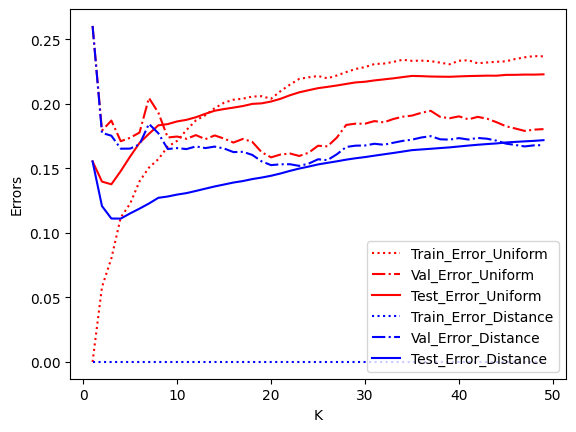

In [16]:
ejercicio_4_ikeda()

### Conclusiones Ikeda

El KNN resulta peor en este caso que las redes neuronales, para ambas estrategias. Es notable que el KNN por distancia tiene un train error de 0. Asumiría un sobreajuste, pero los errores de test son aun mejores que KNN uniforme. 
En cualquier caso, aún eligiendo el mejor K para la validación, resulta un problema demasiado complejo para este tipo de algoritmos, y las redes son mejores (aunque más lentas si la cantidad de consultas es pequeña).

Notable que al igual que los ejercicios anteriores, los resultados son algo erráticos.

                0         1        2
0   KNN Uniform 1  0.008196  0.00000
1  KNN Distance 1  0.008196  0.00000
2             ANN  0.004992  0.00333


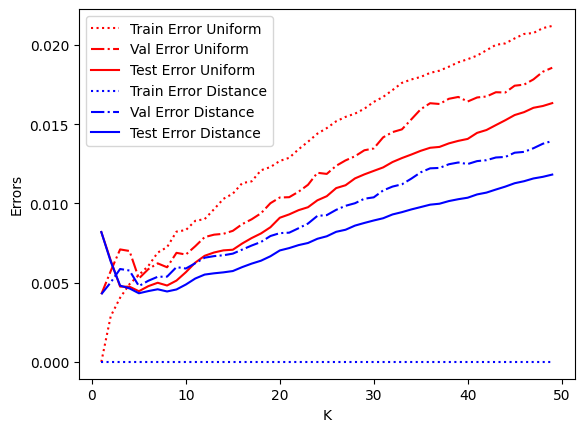

In [19]:
ejercicio_4_ssp()

### Conclusiones SSP

Es bastante similar al caso anterior, con la diferencia que elige el K=1 para ambos casos, porque a partir de ahí solo empeora. También el resultado el algo errático, a veces hay una pequeña meseta lo suficientemente grande para elegir un K=4 o K=3. 
Aún así, el resultado es bastante malo, solo empeora conforme avanza K (distinto de Ikeda en ese aspecto) y las redes son claramente mejores para este tipo de problemas.

## Ejercicio 5

In [22]:
def knn_radius_train(r, X_train, y_train, X_val, y_val, X_test, y_test):
    
    radnn = RadiusNeighborsRegressor(radius=r, weights="distance")
    
    radnn.fit(X_train, y_train)
 
    results_test = radnn.predict(X_test)
    results_val = radnn.predict(X_val)
    results_train = radnn.predict(X_train)

    error_train = mean_squared_error(y_train, results_train)
    error_val = mean_squared_error(y_val, results_val)
    error_test = mean_squared_error(y_test, results_test)

    return error_train, error_val, error_test

def choose_best_r():

    c = 0.78
    n = 250
    d = 32

    centros_a = centros_eja(d)

    test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)
    X_test, y_test = test_case_a.iloc[:, :-1], test_case_a.iloc[:, -1:]

    values = generar_valores(centros_a, c * sqrt(d), d, n)
    X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

    X_train, X_val, y_train, y_val = train_test_split(
        X_raw, y_raw, test_size=0.2, random_state=42
    )

    best_error_val = 1

    r_values = np.arange(0.01, 0.1, 0.01)

    for r in r_values:
        _, error_val, _ = knn_radius_train(
            r, X_train, y_train, X_val, y_val, X_test, y_test
        )

        if error_val < best_error_val:
            best_error_val = error_val
            best_r_para = r

    print("The best R parallel is " + str(best_r_para))

    centros_b = centros_ejb(d)

    test_case_b = generar_valores(centros_b, c, d, 10000)
    X_test, y_test = test_case_b.iloc[:, :-1], test_case_b.iloc[:, -1:]

    values = generar_valores(centros_b, c, d, n)
    X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

    X_train, X_val, y_train, y_val = train_test_split(
        X_raw, y_raw, test_size=0.2, random_state=42
    )

    best_error_val = 1

    for r in r_values:
        _, error_val, _ = knn_radius_train(
            r, X_train, y_train, X_val, y_val, X_test, y_test
        )

        if error_val < best_error_val:
            best_error_val = error_val
            best_r_diag = r

    print("The best R diagonal is " + str(best_r_diag))

    return best_r_para, best_r_diag


def ejercicio_5():
    c = 0.78
    n = 250

    d_values = [2, 4, 8, 16, 32]

    k_optimo_para, k_optimo_diag = choose_best_k()
    r_optimo_para, r_optimo_diag = choose_best_r()

    errors = []

    for d in d_values:
        centros_a = centros_eja(d)

        test_case_a = generar_valores(centros_a, c * sqrt(d), d, 10000)
        X_test, y_test = test_case_a.iloc[:, :-1], test_case_a.iloc[:, -1:]

        values = generar_valores(centros_a, c * sqrt(d), d, n)
        X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

        X_train, X_val, y_train, y_val = train_test_split(
            X_raw, y_raw, test_size=0.2, random_state=42
        )

        error_train_r_best, _, error_test_r_best = knn_radius_train(
            r_optimo_para, X_train, y_train, X_val, y_val, X_test, y_test
        )

        error_train_w_50, _, error_test_w_50 = knn_train(
            50, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )
        error_train_w_best, _, error_test_w_best = knn_train(
            k_optimo_para, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )

        error_train_1, _, error_test_1 = knn_train(
            1, X_train, y_train, X_val, y_val, X_test, y_test
        )
        error_train_k, _, error_test_k = knn_train(
            2, X_train, y_train, X_val, y_val, X_test, y_test
        )

        errors.append([error_test_1, d, "Test_Parallel_KN1"])
        errors.append([error_train_1, d, "Val_Parallel_KN1"])
        errors.append([error_test_k, d, "Test_Parallel_KNK"])
        errors.append([error_train_k, d, "Val_Parallel_KNK"])
        errors.append([error_test_w_50, d, "Test_Parallel_Weight_KN50"])
        errors.append([error_train_w_50, d, "Val_Parallel_Weight_KN50"])
        errors.append([error_test_w_best, d, "Test_Parallel_Weight_KNBest"])
        errors.append([error_train_w_best, d, "Val_Parallel_Weight_KNBest"])
        errors.append([error_test_r_best, d, "Test_Parallel_Radius_KNBest"])
        errors.append([error_train_r_best, d, "Val_Parallel_Radius_KNBest"])

    for d in d_values:
        centros_b = centros_ejb(d)

        test_case_b = generar_valores(centros_b, c, d, 10000)
        X_test, y_test = test_case_b.iloc[:, :-1], test_case_b.iloc[:, -1:]

        values = generar_valores(centros_b, c * sqrt(d), d, n)
        X_raw, y_raw = values.iloc[:, :-1], values.iloc[:, -1:]

        X_train, X_val, y_train, y_val = train_test_split(
            X_raw, y_raw, test_size=0.2, random_state=42
        )

        error_train_r_best, _, error_test_r_best = knn_radius_train(
            r_optimo_diag, X_train, y_train, X_val, y_val, X_test, y_test
        )

        error_train_w_50, _, error_test_w_50 = knn_train(
            50, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )
        error_train_w_best, _, error_test_w_best = knn_train(
            k_optimo_diag, X_train, y_train, X_val, y_val, X_test, y_test, w=True
        )

        error_train_1, _, error_test_1 = knn_train(
            1, X_train, y_train, X_val, y_val, X_test, y_test
        )
        error_train_k, _, error_test_k = knn_train(
            2, X_train, y_train, X_val, y_val, X_test, y_test
        )

        errors.append([error_test_1, d, "Test_Diagonal_KN1"])
        errors.append([error_train_1, d, "Val_Diagonal_KN1"])
        errors.append([error_test_k, d, "Test_Diagonal_KNK"])
        errors.append([error_train_k, d, "Val_Diagonal_KNK"])
        errors.append([error_test_w_50, d, "Test_Diagonal_Weight_KN50"])
        errors.append([error_train_w_50, d, "Val_Diagonal_Weight_KN50"])
        errors.append([error_test_w_best, d, "Test_Diagonal_Weight_KNBest"])
        errors.append([error_train_w_best, d, "Val_Diagonal_Weight_KNBest"])
        errors.append([error_test_r_best, d, "Test_Diagonal_Weight_KNBest"])
        errors.append([error_train_r_best, d, "Val_Diagonal_Weight_KNBest"])

    df_errors = pd.DataFrame(errors, columns=["Error", "D", "Type"])
    plot_error_lines_with_dimensions(df_errors)


def pick_rs():
  c = 0.78
  n = 250
  d = 32
  centros_a = centros_eja(d)

  values = generar_valores(centros_a, c * sqrt(d), d, n)

  values_list = values.iloc[:, :-1].values

  
  distances = []
  
  for v in values_list:
    for u in values_list:
      distances.append(dist(v,u))
  
  print(distances)

The best K parallel is 8
The best K diagonal is 31


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: in

The best R parallel is 0.01


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: in

The best R diagonal is 0.01


<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: invalid value encountered in cast
<__array_function__ internals>:200: RuntimeWarning: in

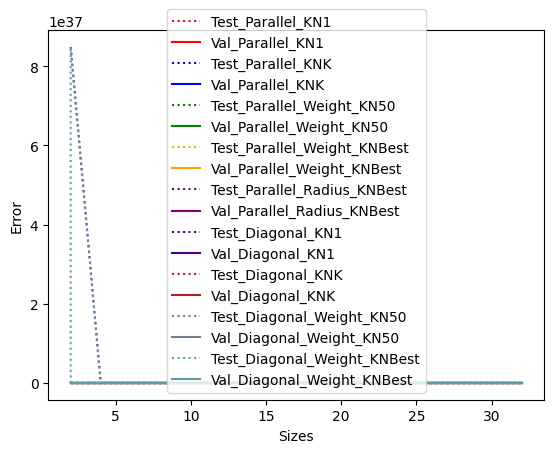

In [23]:
ejercicio_5()

### Conclusiones ejercicio 5

Este ejercicio me destruyó. Pasé mucho tiempo tratando de pensar estrategias para encontrar el mejor R, mi preferida es una función que incluí al final que trataba de escoger una distancia mínima entre puntos como para tener un rango de distancias en las cuales trabajar pero el resultado fue pésimo.
Tan malo que el error daba mal siempre y siempre eligía el menor. Fui jugando con distintas distancias y al final con 0.01 da mejor, pero yo creo que da mejor porque está haciendo una conversión extrañisima de Float a Int en algún lugar interno del funcionamiento del programa que desconozco fuertemente de donde viene.
Googleé mucho, pero con la fecha cerca de la otra entrega, decidí entregarlo así.

Imagino que viene de algún lugar que no estoy viendo y debe ser una boludez, y quizás mi primer intento de encontrar la distancia mínima y recorrer en distancias cercanas a esa en forma creciente era una buena idea para encontrar un radio. 

No creo que tenga sentido comentar ese gráfico :(